# Osteoporosis Risk Prediction

## 1. Introduction

This project aims to predict the risk of osteoporosis using demographic, lifestyle, and health-related features. Machine learning models will be employed to classify individuals at risk of developing osteoporosis.

The dataset, sourced from Kaggle, includes variables such as:
- Age
- Gender
- Weight, Height
- Lifestyle habits (diet, physical activity, smoking, etc.)

By focusing on tabular data, this project emphasizes:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training (Logistic Regression, Random Forest, XGBoost)
- Model Evaluation & Comparison
- Hyperparameter Tuning
- Insights & Conclusion


## 2. Exploratory Data Analysis (EDA)

In this section, we will:
1. Load the dataset from the `data/raw/` folder.
2. Display the first few rows to understand the structure.
3. Inspect column data types and non-null counts.
4. View summary statistics of numerical columns.
5. Check for missing values.
6. Explore the distribution of the target variable.


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('../data/raw/osteoporosis.csv')

In [9]:
df.head()

Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0  1734616   69  Female           Normal            Yes             Asian   
1  1419098   32  Female           Normal            Yes             Asian   
2  1797916   89  Female   Postmenopausal             No         Caucasian   
3  1805337   78  Female           Normal             No         Caucasian   
4  1351334   38    Male   Postmenopausal            Yes  African American   

   Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0  Underweight            Low       Sufficient         Sedentary     Yes   
1  Underweight            Low       Sufficient         Sedentary      No   
2       Normal       Adequate       Sufficient            Active      No   
3  Underweight       Adequate     Insufficient         Sedentary     Yes   
4       Normal            Low       Sufficient            Active     Yes   

  Alcohol Consumption    Medical Conditions      Medications Prior Fractures  \
0            Moderate  Rheumatoid Arthritis  Corticosteroids             Yes   
1                 NaN                   NaN              NaN             Yes   
2            Moderate       Hyperthyroidism  Corticosteroids              No   
3                 NaN  Rheumatoid Arthritis  Corticosteroids              No   
4                 NaN  Rheumatoid Arthritis              NaN             Yes   

   Osteoporosis  
0             1  
1             1  
2             1  
3             1  
4             1

In [15]:
df.describe()

Id          Age  Osteoporosis
count  1.958000e+03  1958.000000   1958.000000
mean   1.549929e+06    39.101124      0.500000
std    2.614250e+05    21.355424      0.500128
min    1.100064e+06    18.000000      0.000000
25%    1.319163e+06    21.000000      0.000000
50%    1.546028e+06    32.000000      0.500000
75%    1.775870e+06    53.000000      1.000000
max    1.999676e+06    90.000000      1.000000

In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

## 2.1 Target Variable Analysis

The target variable `Osteoporosis` is binary:
- 1: At risk / diagnosed with osteoporosis
- 0: No osteoporosis

We will:
1. Calculate the counts and percentages of each class.
2. Visualize the distribution to check for class balance.


Osteoporosis
1    979
0    979
Name: count, dtype: int64
\Percentages (%):
Osteoporosis
1    50.0
0    50.0
Name: proportion, dtype: float64


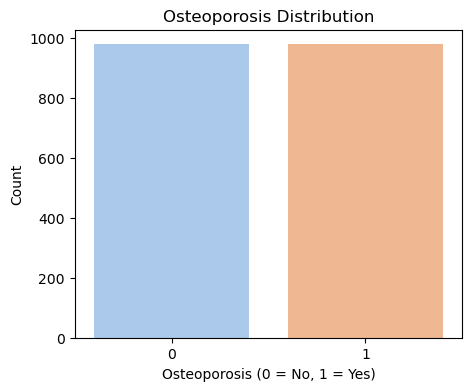

In [26]:
print(df['Osteoporosis'].value_counts())
print("\Percentages (%):")
print(df['Osteoporosis'].value_counts(normalize=True) * 100)


plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Osteoporosis', palette='pastel')
plt.title("Osteoporosis Distribution")
plt.xlabel("Osteoporosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## 2.2 Missing Values Analysis

We will:
1. Identify columns with missing values and calculate both the count and percentage of missing entries.
2. Visualize missing values.
3. Prepare strategies for handling missing data in the next step.


                     Missing Count  Missing %
Alcohol Consumption            988  50.459653
Medications                    985  50.306435
Medical Conditions             647  33.043922


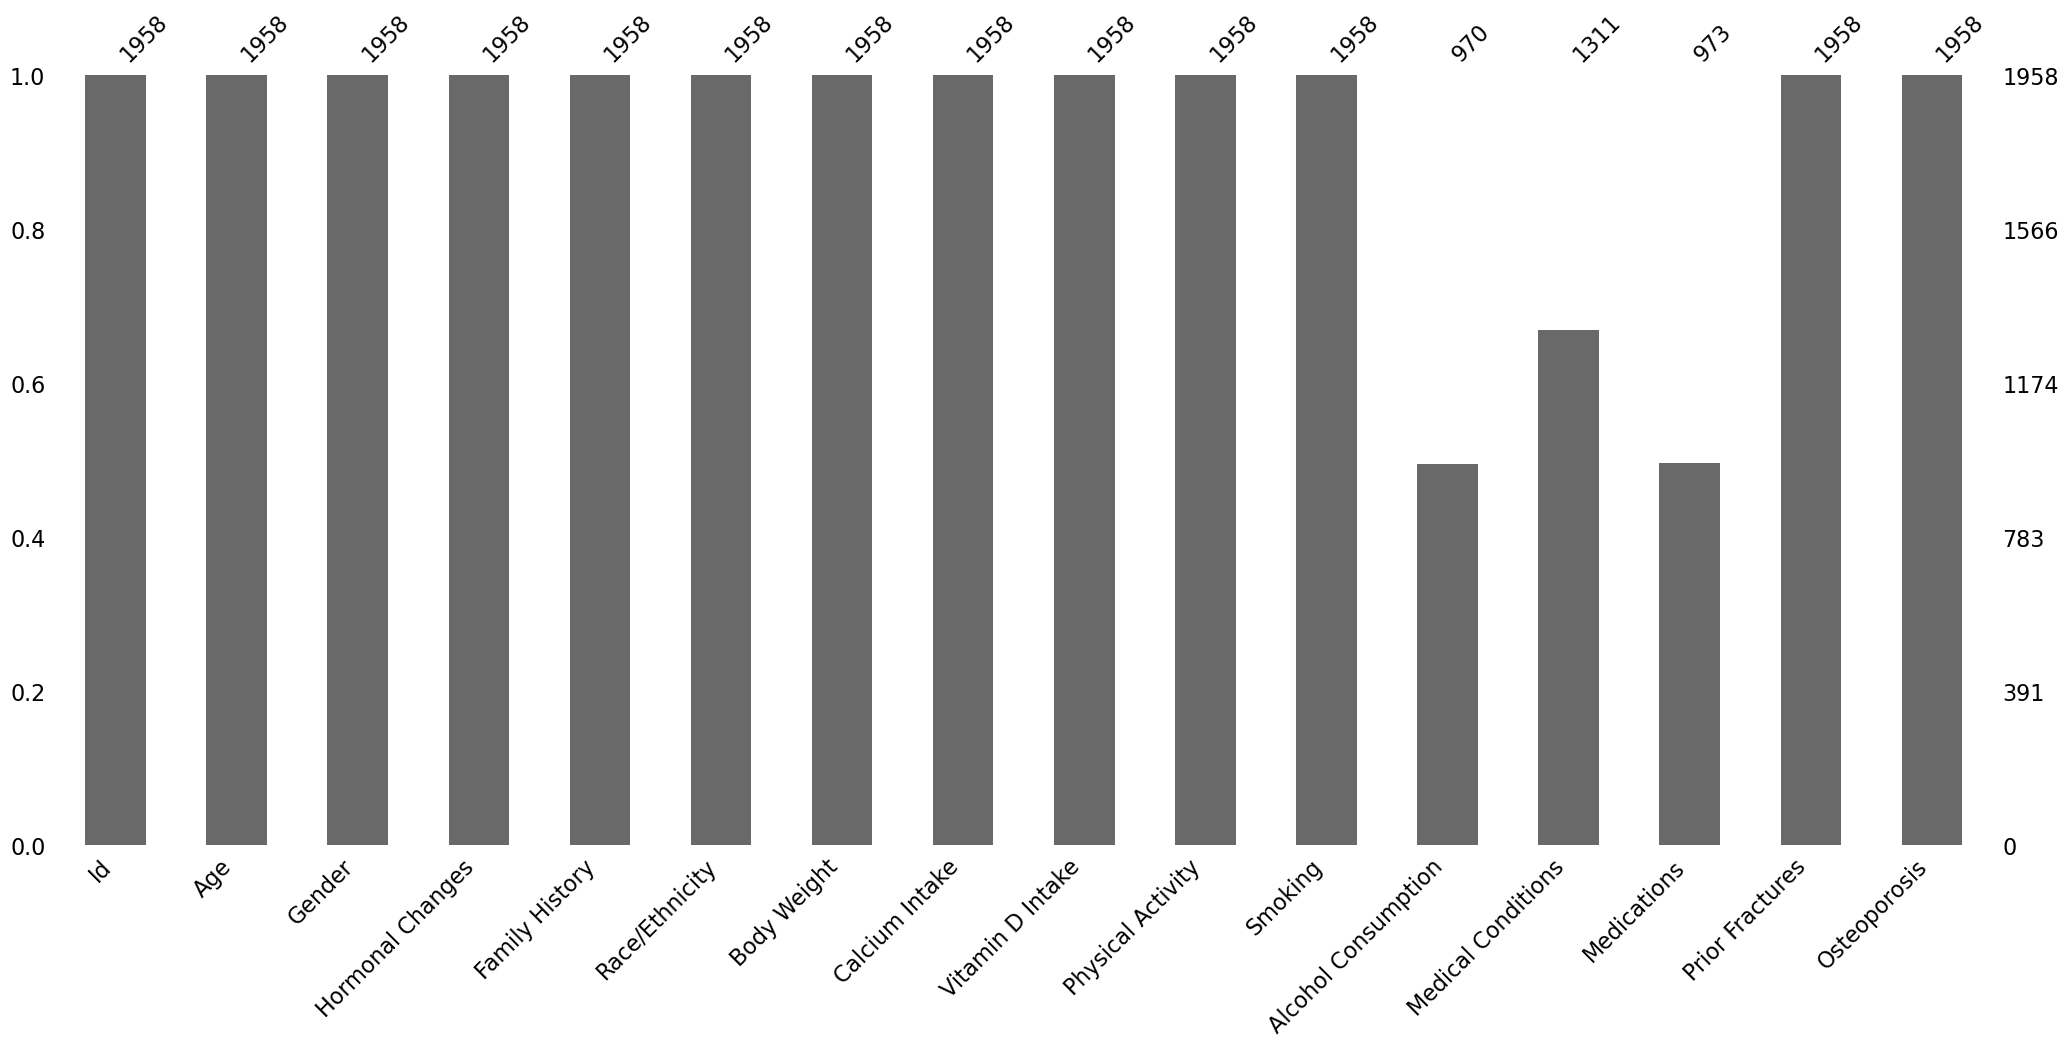

In [29]:
import missingno as msno

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count' : missing_count, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)

msno.bar(df)
plt.show()

## 2.3 Missing Value Imputation

We will handle missing values in categorical columns as follows:
- Replace missing entries with 'Unknown' to preserve information without introducing bias.
- This approach is chosen because:
  1. The missing rate is high (~50%) in some columns.
  2. Using mode imputation could distort the data distribution.
  3. 'Unknown' can be treated as a separate category during model training.


In [32]:
cols_to_fill = ['Alcohol Consumption', 'Medications', 'Medical Conditions']
df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

print(df[cols_to_fill].isnull().sum())

Alcohol Consumption    0
Medications            0
Medical Conditions     0
dtype: int64


## 2.4 Numerical Feature Analysis

We will:
1. Identify numerical features in the dataset.
2. Review descriptive statistics (mean, median, standard deviation, min, max).
3. Visualize distributions with histograms.
4. Explore the relationship between numerical features and the target variable using boxplots.


In [35]:
# Object tipinde olan s√ºtunlarƒ±n benzersiz deƒüerlerini incele
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} - unique values sample:")
    print(df[col].unique()[:10])  # ilk 10 farklƒ± deƒüeri g√∂ster



Gender - unique values sample:
['Female' 'Male']

Hormonal Changes - unique values sample:
['Normal' 'Postmenopausal']

Family History - unique values sample:
['Yes' 'No']

Race/Ethnicity - unique values sample:
['Asian' 'Caucasian' 'African American']

Body Weight - unique values sample:
['Underweight' 'Normal']

Calcium Intake - unique values sample:
['Low' 'Adequate']

Vitamin D Intake - unique values sample:
['Sufficient' 'Insufficient']

Physical Activity - unique values sample:
['Sedentary' 'Active']

Smoking - unique values sample:
['Yes' 'No']

Alcohol Consumption - unique values sample:
['Moderate' 'Unknown']

Medical Conditions - unique values sample:
['Rheumatoid Arthritis' 'Unknown' 'Hyperthyroidism']

Medications - unique values sample:
['Corticosteroids' 'Unknown']

Prior Fractures - unique values sample:
['Yes' 'No']


count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: Age, dtype: float64


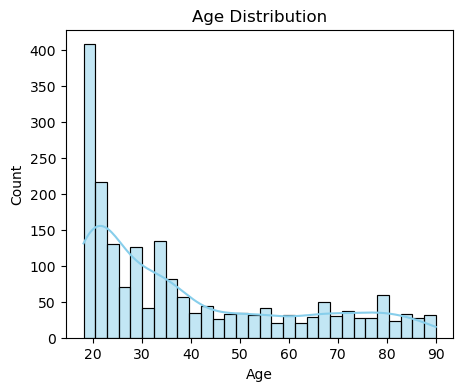

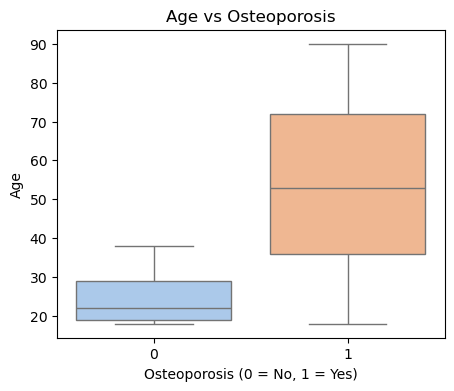

In [45]:
print(df['Age'].describe())

plt.figure(figsize=(5,4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(x='Osteoporosis', y='Age', data=df, palette='pastel')
plt.title("Age vs Osteoporosis")
plt.xlabel("Osteoporosis (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

## 2.5 Categorical Feature Analysis

We will:
1. Display the number of unique categories for each categorical column.
2. Show frequency distributions for each category.
3. Analyze relationships between categorical features and the target variable (`Osteoporosis`) using cross-tabulation and bar plots.



=== Gender ===
Value counts:
Gender
Male      992
Female    966
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis     0     1
Gender                  
Female        50.6  49.4
Male          49.4  50.6


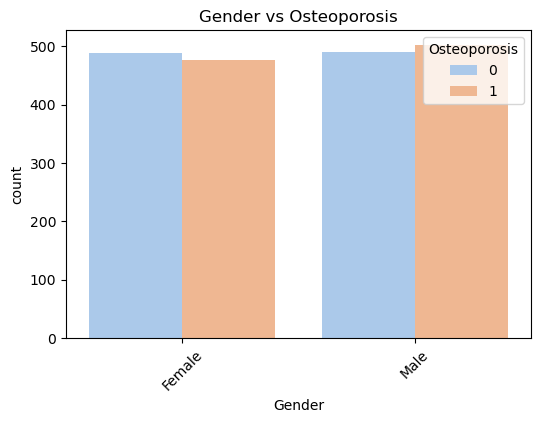


=== Hormonal Changes ===
Value counts:
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis         0     1
Hormonal Changes            
Normal            50.8  49.2
Postmenopausal    49.2  50.8


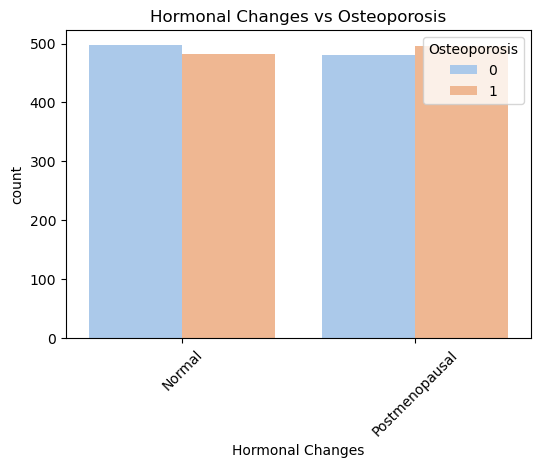


=== Family History ===
Value counts:
Family History
No     998
Yes    960
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis       0     1
Family History            
No              49.9  50.1
Yes             50.1  49.9


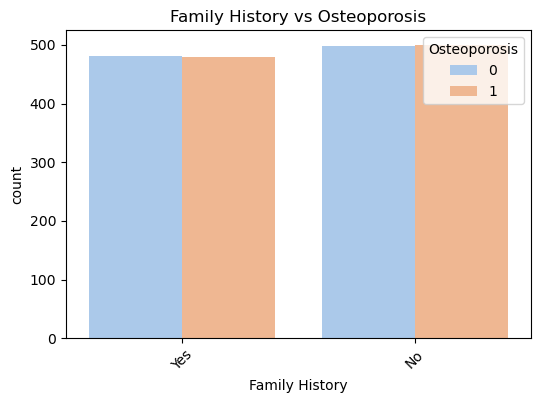


=== Race/Ethnicity ===
Value counts:
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis         0     1
Race/Ethnicity              
African American  49.5  50.5
Asian             50.2  49.8
Caucasian         50.3  49.7


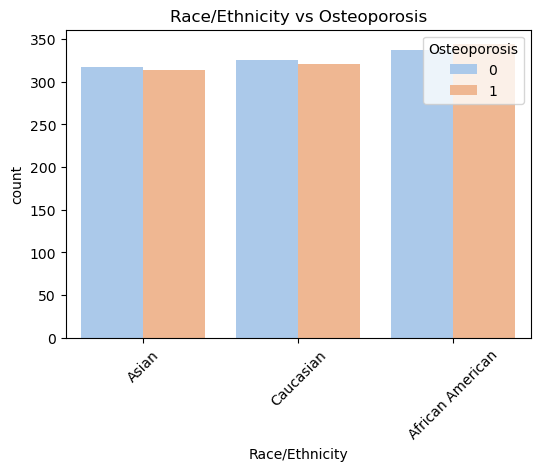


=== Body Weight ===
Value counts:
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis     0     1
Body Weight             
Normal        51.7  48.3
Underweight   48.1  51.9


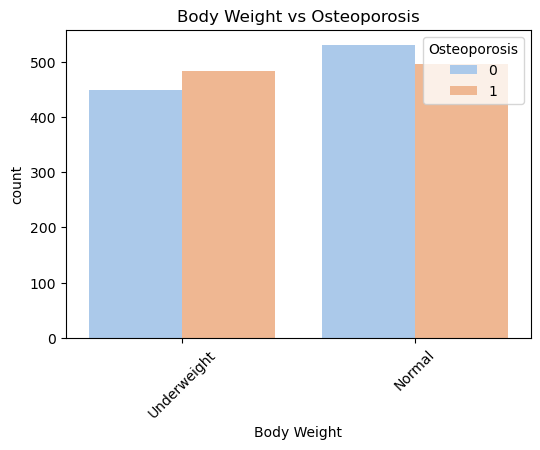


=== Calcium Intake ===
Value counts:
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis       0     1
Calcium Intake            
Adequate        49.8  50.2
Low             50.2  49.8


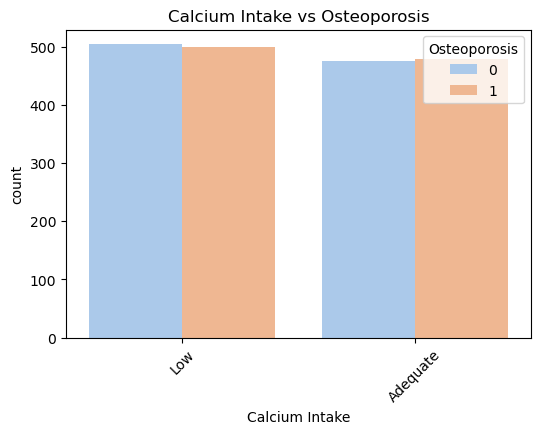


=== Vitamin D Intake ===
Value counts:
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis         0     1
Vitamin D Intake            
Insufficient      50.9  49.1
Sufficient        49.2  50.8


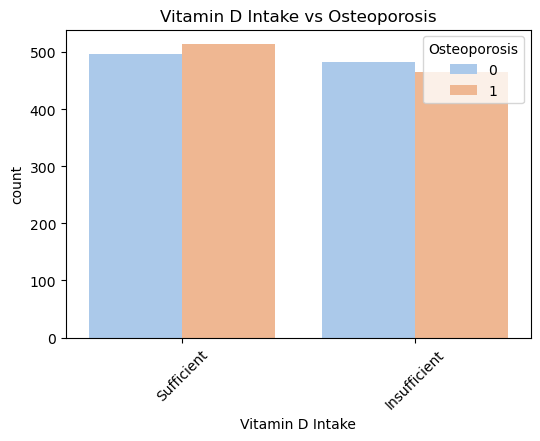


=== Physical Activity ===
Value counts:
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis          0     1
Physical Activity            
Active             50.9  49.1
Sedentary          49.0  51.0


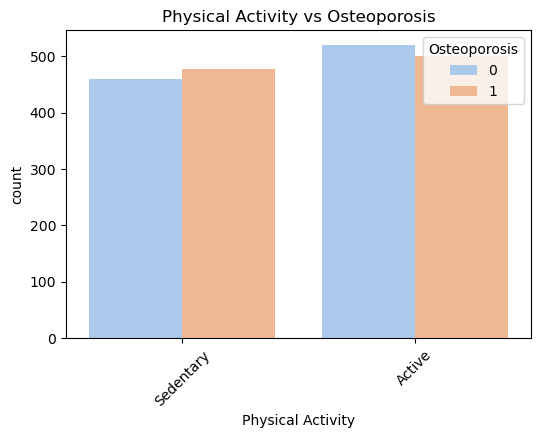


=== Smoking ===
Value counts:
Smoking
Yes    982
No     976
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis     0     1
Smoking                 
No            49.2  50.8
Yes           50.8  49.2


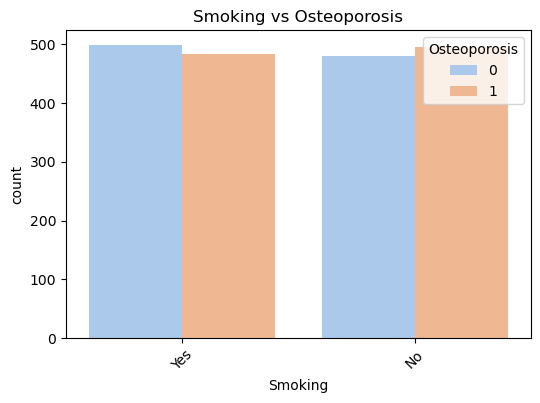


=== Alcohol Consumption ===
Value counts:
Alcohol Consumption
Unknown     988
Moderate    970
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis            0     1
Alcohol Consumption            
Moderate             49.9  50.1
Unknown              50.1  49.9


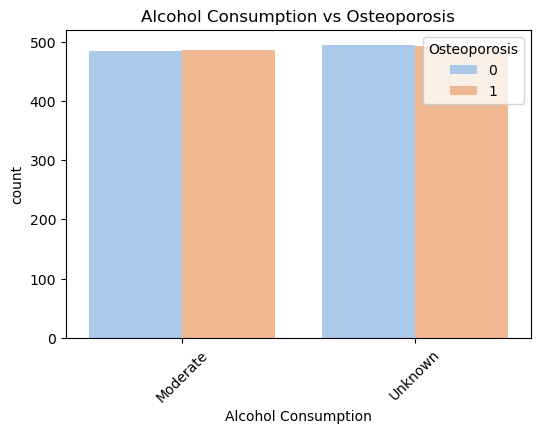


=== Medical Conditions ===
Value counts:
Medical Conditions
Hyperthyroidism         678
Unknown                 647
Rheumatoid Arthritis    633
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis             0     1
Medical Conditions              
Hyperthyroidism       49.4  50.6
Rheumatoid Arthritis  49.8  50.2
Unknown               50.9  49.1


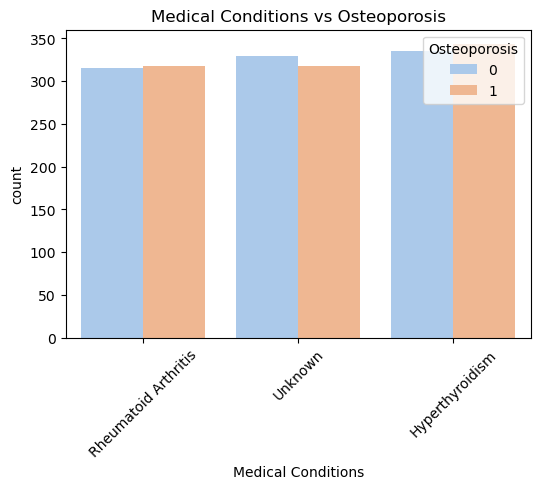


=== Medications ===
Value counts:
Medications
Unknown            985
Corticosteroids    973
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis        0     1
Medications                
Corticosteroids  48.3  51.7
Unknown          51.7  48.3


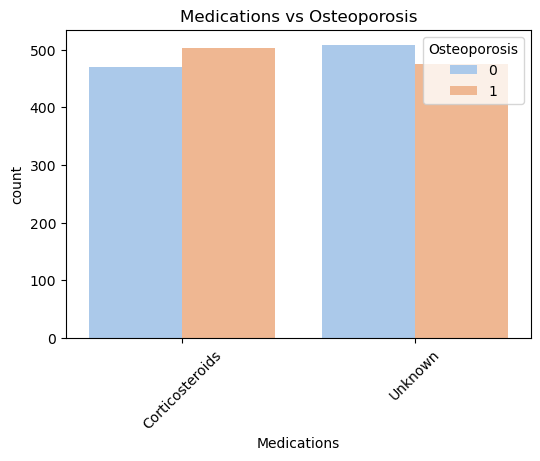


=== Prior Fractures ===
Value counts:
Prior Fractures
Yes    983
No     975
Name: count, dtype: int64

Osteoporosis distribution (%):
Osteoporosis        0     1
Prior Fractures            
No               50.8  49.2
Yes              49.2  50.8


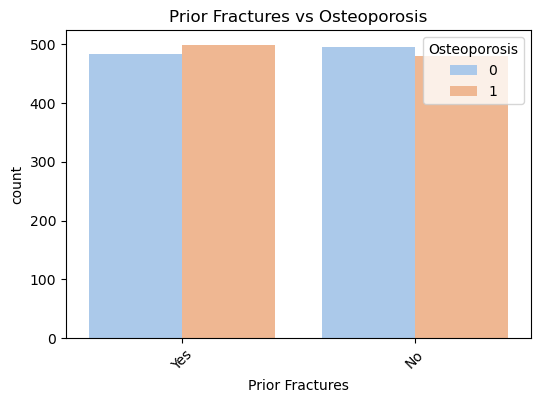

In [66]:
import re
cat_cols = df.select_dtypes(include='object').columns.tolist()

 
for col in cat_cols:
    print(f"\n=== {col} ===")
    print("Value counts:")
    print(df[col].value_counts(dropna=False))
    
    print("\nOsteoporosis distribution (%):")
    cross_tab = pd.crosstab(df[col], df['Osteoporosis'], normalize='index') * 100
    print(cross_tab.round(1))
    
 
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Osteoporosis', palette='pastel')
    plt.title(f"{col} vs Osteoporosis")
    plt.xticks(rotation=45)
    safe_col_name = re.sub(r'[\\/*?:"<>| ]', "_", col)
    file_name = f"{safe_col_name}_vs_Osteoporosis.png"
    plt.savefig(f"../images/{file_name}", bbox_inches='tight')
    plt.show()

## 3. Feature Engineering & Encoding

Steps:
1. Remove non-informative columns (`Id`).
2. Separate features (X) and target (y).
3. Encode categorical variables using One-Hot Encoding.
4. Prepare the dataset for model training.


In [80]:
from sklearn.model_selection import train_test_split


df_model = df.drop(columns=['Id'])


X = df_model.drop(columns=['Osteoporosis'])
y = df_model['Osteoporosis']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

 
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (1566, 16)
Test set shape: (392, 16)


## 4. Model Training & Evaluation

We will:
1. Train three different models:
   - Logistic Regression
   - Random Forest Classifier
   - XGBoost Classifier
2. Evaluate models using:
   - Accuracy
   - Precision
   - Recall
   - F1-score
   - ROC AUC
3. Compare the performance of all models.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results= []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy" : accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall" : recall_score(y_test, y_pred),
        "F1-Score" : f1_score(y_test, y_pred),
        "ROC-AUC" : roc_auc_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.808673   0.857988  0.739796  0.794521  0.808673
1        Random Forest  0.829082   0.944828  0.698980  0.803519  0.829082
2              XGBoost  0.862245   0.922619  0.790816  0.851648  0.862245


### 4.1 Visual Comparison of Models

We will:
1. Plot ROC curves for all models to compare their ability to distinguish between classes.
2. Plot Confusion Matrices for all models to visualize true/false positives and negatives.


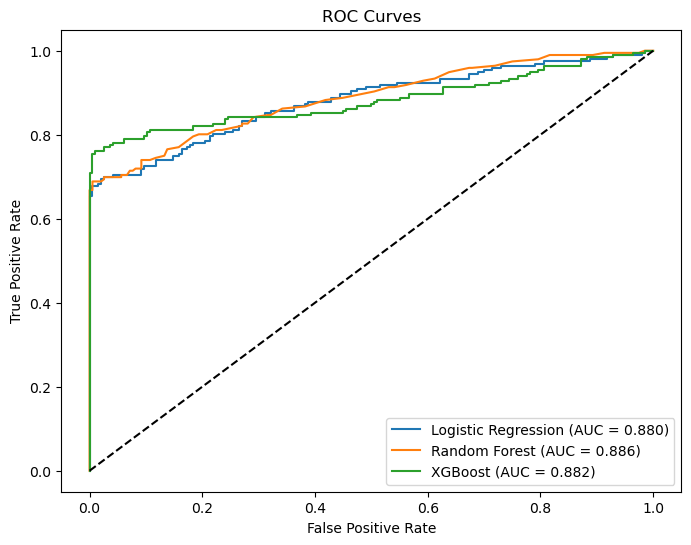

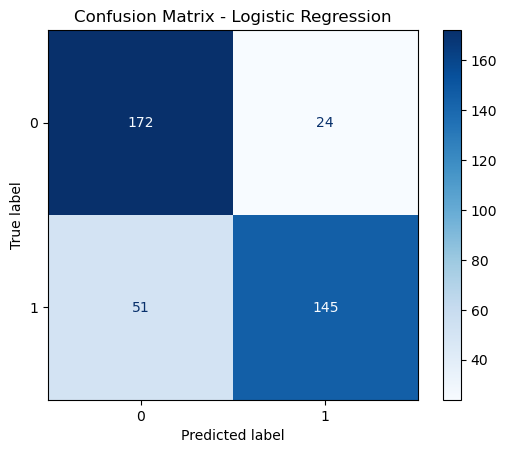

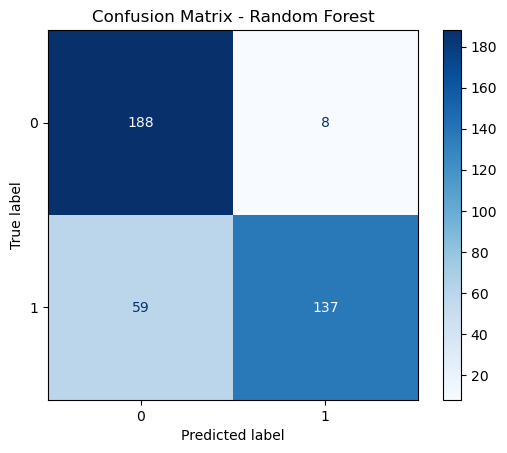

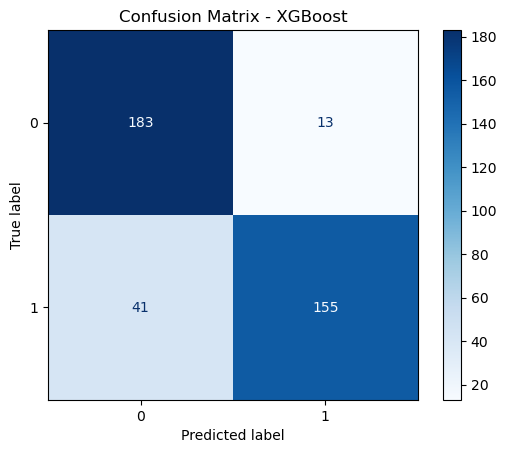

In [94]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

 
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
 
plt.savefig("../images/ROC_Curves.png", bbox_inches='tight')
plt.show()

 
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    
 
    safe_name = name.replace(" ", "_")
    plt.savefig(f"../images/Confusion_Matrix_{safe_name}.png", bbox_inches='tight')
    plt.show()

## 5.Hyperparameter Optimization

In this section, we will fine-tune the Random Forest and XGBoost models using hyperparameter optimization to improve their performance.  
The optimization will focus on maximizing the ROC-AUC score, as it is critical in medical prediction tasks where both sensitivity and specificity matter.  

We will use `RandomizedSearchCV` with 5-fold cross-validation to explore a predefined parameter space for each model.  
The best parameters and their corresponding scores will be recorded, followed by evaluation on the test set to compare improvements over the baseline models.


In [122]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    "n_estimators" : [200, 400, 800, 1200],
    "max_depth" : [None, 5, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "max_features" : ["sqrt", "log2", 0.5],
    "bootstrap": [True, False]  
}

random_search_rf = RandomizedSearchCV(
    estimator=models["Random Forest"],
    param_distributions = param_dist_rf,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=1
)

random_search_rf.fit(X_train, y_train)
print("Random Forest - Best params:", random_search_rf.best_params_)
print("Random Forest - Best score:", random_search_rf.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest - Best params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10, 'bootstrap': False}
Random Forest - Best score: 0.9226458711072694


RF Test Accuracy : 0.8647959183673469
RF Test Precision: 0.9673202614379085
RF Test Recall   : 0.7551020408163265
RF Test F1       : 0.8481375358166189
RF Test ROC-AUC  : 0.8932476051645147


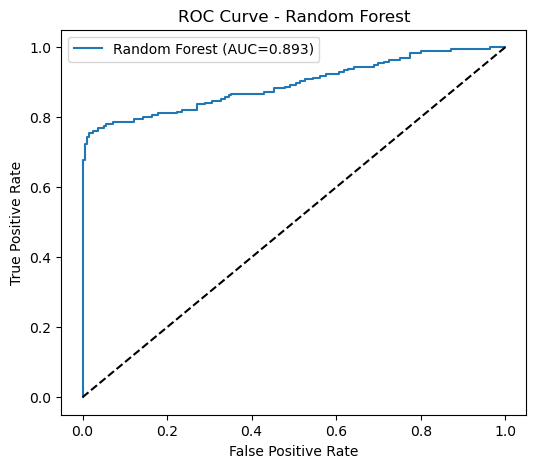

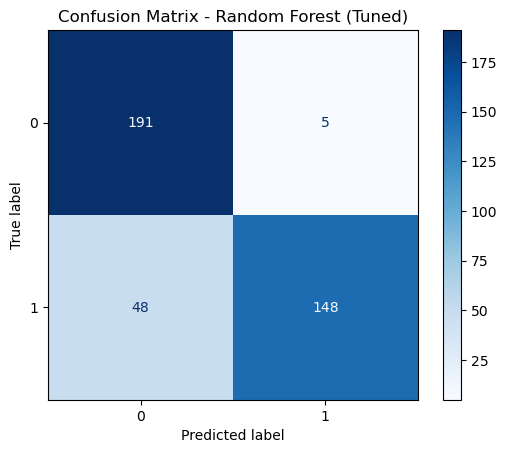

In [124]:
best_rf = random_search_rf.best_estimator_


y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("RF Test Accuracy :", accuracy_score(y_test, y_pred))
print("RF Test Precision:", precision_score(y_test, y_pred))
print("RF Test Recall   :", recall_score(y_test, y_pred))
print("RF Test F1       :", f1_score(y_test, y_pred))
print("RF Test ROC-AUC  :", roc_auc_score(y_test, y_prob))




 
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve - Random Forest"); plt.legend()
plt.savefig("../images/ROC_Random_Forest_TUNED.png", bbox_inches="tight"); plt.show()

 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap="Blues"); plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.savefig("../images/CM_Random_Forest_TUNED.png", bbox_inches="tight"); plt.show()

Fitting 5 folds for each of 60 candidates, totalling 300 fits
XGBoost - Best params: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.001, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 1.0}
XGBoost - Best ROC-AUC CV: 0.9328

=== XGBoost (Tuned) Test Metrics ===
Accuracy : 0.875
Precision: 0.9741935483870968
Recall   : 0.7704081632653061
F1-Score : 0.8603988603988604
ROC-AUC  : 0.8886531653477718


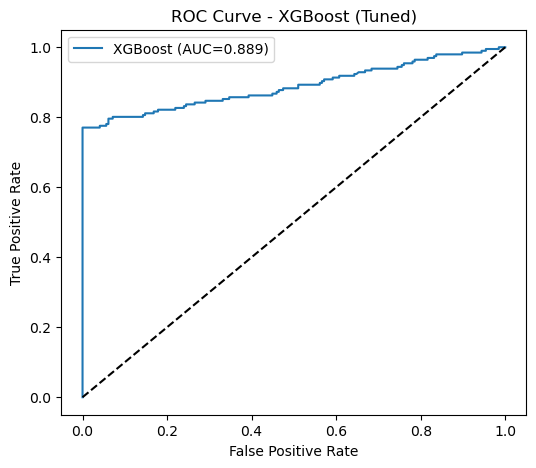

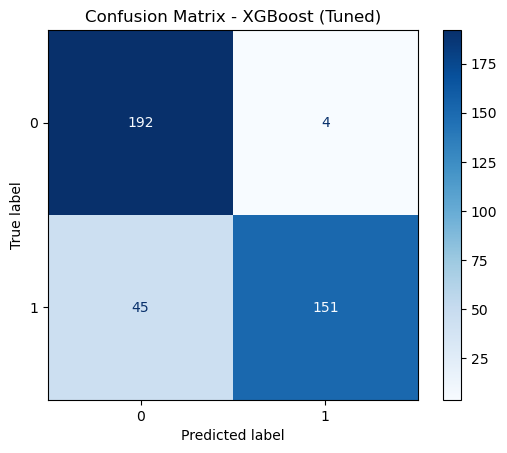

In [128]:
xgb_param_dist = {
    "n_estimators": [300, 600, 900, 1200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "max_depth": [3, 4, 5, 6, 8],
    "min_child_weight": [1, 3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "reg_alpha": [0, 0.001, 0.01, 0.1],
    "reg_lambda": [0.5, 1, 1.5, 2],
}

 
xgb_base = XGBClassifier(
    random_state=42,
    use_label_encoder=False,     
    eval_metric="auc",          
    tree_method="hist"          
)

 
xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=60,                 
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True,                  
    return_train_score=True
)

xgb_search.fit(X_train, y_train)

print("XGBoost - Best params:", xgb_search.best_params_)
print(f"XGBoost - Best ROC-AUC CV: {xgb_search.best_score_:.4f}")


best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost (Tuned) Test Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))


 

 
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)"); plt.legend()
plt.savefig("../images/ROC_XGBoost_TUNED.png", bbox_inches="tight"); plt.show()

 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap="Blues"); plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.savefig("../images/CM_XGBoost_TUNED.png", bbox_inches="tight"); plt.show()

### 5.2 Baseline vs Tuned ‚Äî Visual Comparison
We plot ROC curves for baseline and tuned versions of Random Forest and XGBoost, and a grouped bar chart comparing Accuracy, Precision, Recall, F1, and ROC-AUC. A CSV with all metrics is also saved for reporting.


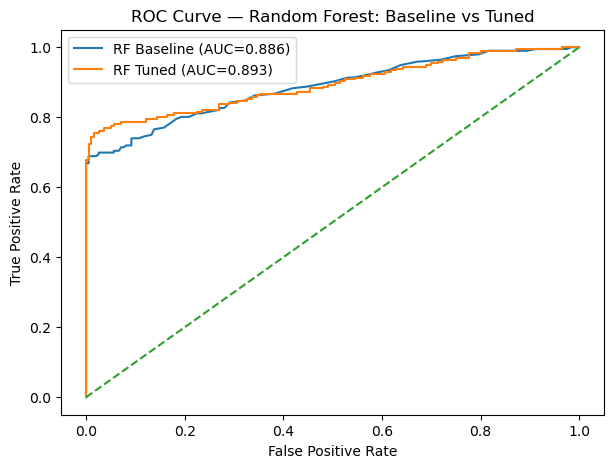

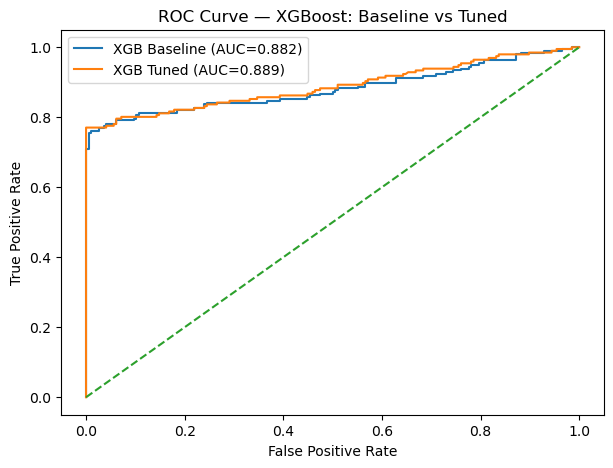

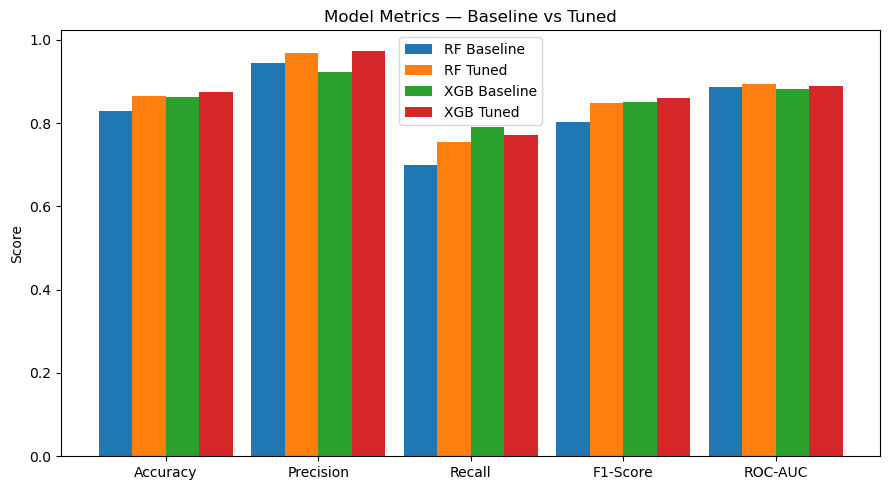

In [132]:

def eval_metrics(model, X_te, y_te):
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]
    return {
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "F1-Score": f1_score(y_te, y_pred),
        "ROC-AUC": roc_auc_score(y_te, y_prob),
        "y_prob": y_prob  
    }

 
rf_base = models["Random Forest"]            
rf_tuned = best_rf                           

rf_base_eval  = eval_metrics(rf_base, X_test, y_test)
rf_tuned_eval = eval_metrics(rf_tuned, X_test, y_test)

fpr_b, tpr_b, _ = roc_curve(y_test, rf_base_eval["y_prob"])
fpr_t, tpr_t, _ = roc_curve(y_test, rf_tuned_eval["y_prob"])

plt.figure(figsize=(7,5))
plt.plot(fpr_b, tpr_b, label=f"RF Baseline (AUC={rf_base_eval['ROC-AUC']:.3f})")
plt.plot(fpr_t, tpr_t, label=f"RF Tuned (AUC={rf_tuned_eval['ROC-AUC']:.3f})")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve ‚Äî Random Forest: Baseline vs Tuned")
plt.legend()
plt.savefig("../images/ROC_Compare_RandomForest.png", bbox_inches="tight")
plt.show()

 
xgb_base  = models["XGBoost"]                
xgb_tuned = best_xgb

xgb_base_eval  = eval_metrics(xgb_base, X_test, y_test)
xgb_tuned_eval = eval_metrics(xgb_tuned, X_test, y_test)

fpr_b, tpr_b, _ = roc_curve(y_test, xgb_base_eval["y_prob"])
fpr_t, tpr_t, _ = roc_curve(y_test, xgb_tuned_eval["y_prob"])

plt.figure(figsize=(7,5))
plt.plot(fpr_b, tpr_b, label=f"XGB Baseline (AUC={xgb_base_eval['ROC-AUC']:.3f})")
plt.plot(fpr_t, tpr_t, label=f"XGB Tuned (AUC={xgb_tuned_eval['ROC-AUC']:.3f})")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve ‚Äî XGBoost: Baseline vs Tuned")
plt.legend()
plt.savefig("../images/ROC_Compare_XGBoost.png", bbox_inches="tight")
plt.show()

 
rows = []
rows.append({"Model":"RF Baseline", **{k:v for k,v in rf_base_eval.items() if k!='y_prob'}})
rows.append({"Model":"RF Tuned",    **{k:v for k,v in rf_tuned_eval.items() if k!='y_prob'}})
rows.append({"Model":"XGB Baseline",**{k:v for k,v in xgb_base_eval.items() if k!='y_prob'}})
rows.append({"Model":"XGB Tuned",   **{k:v for k,v in xgb_tuned_eval.items() if k!='y_prob'}})

cmp_df = pd.DataFrame(rows)
cmp_df.to_csv("../images/metrics_comparison.csv", index=False)  

metrics = ["Accuracy","Precision","Recall","F1-Score","ROC-AUC"]

plt.figure(figsize=(9,5))
x = np.arange(len(metrics))
width = 0.22

def vals(mname):
    return [cmp_df.loc[cmp_df["Model"]==mname, m].values[0] for m in metrics]

plt.bar(x - 1.5*width, vals("RF Baseline"),  width, label="RF Baseline")
plt.bar(x - 0.5*width, vals("RF Tuned"),     width, label="RF Tuned")
plt.bar(x + 0.5*width, vals("XGB Baseline"), width, label="XGB Baseline")
plt.bar(x + 1.5*width, vals("XGB Tuned"),    width, label="XGB Tuned")

plt.xticks(x, metrics, rotation=0)
plt.ylabel("Score")
plt.title("Model Metrics ‚Äî Baseline vs Tuned")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Metrics_Comparison_Bar.png", bbox_inches="tight")
plt.show()




## 6. Model Explainability (Feature Importance & SHAP)

In this section we interpret our tuned tree-based models.

**What we‚Äôll do**
1. Model-based feature importances (RF & XGB) ‚Äî top 15 features.
2. Permutation importance (model-agnostic) for robustness.
3. SHAP analysis for XGBoost:
   - Summary (beeswarm) plot
   - Bar plot of mean |SHAP|
   - Dependence plot for the most important feature
4. Save all figures to `images/` for the report.


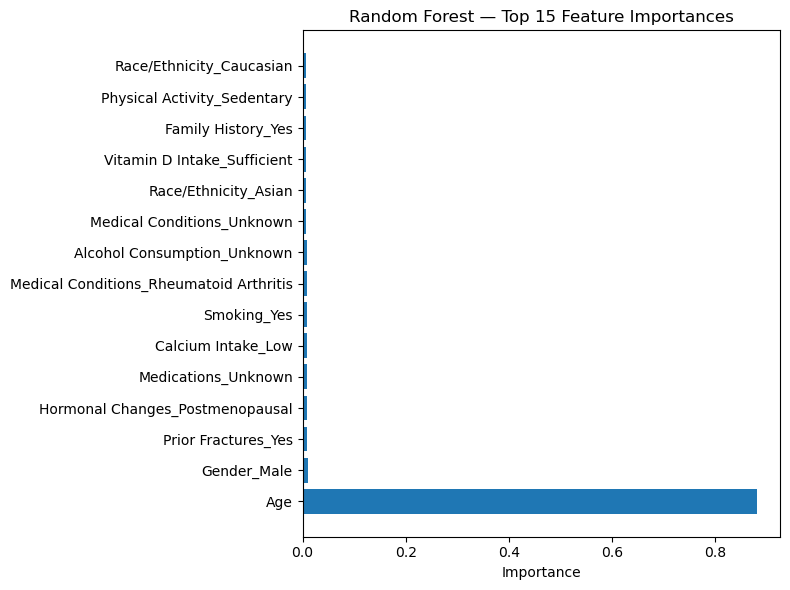

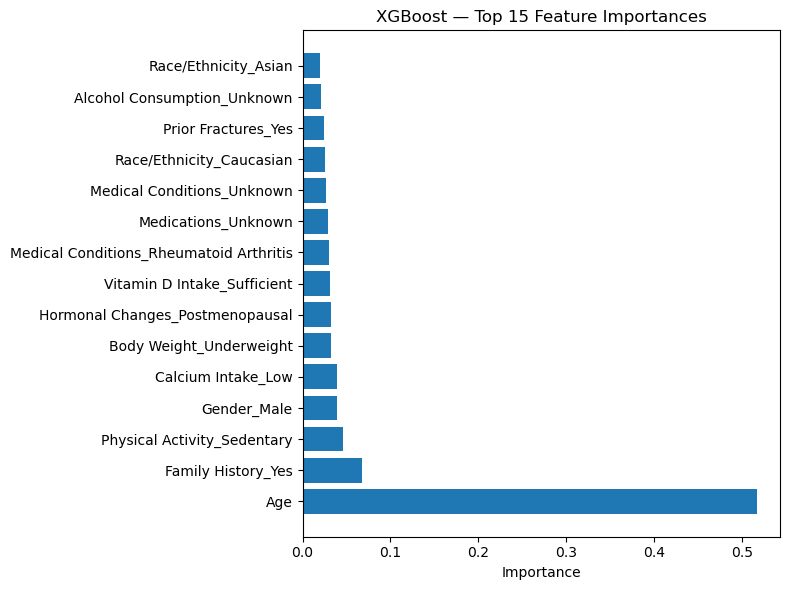

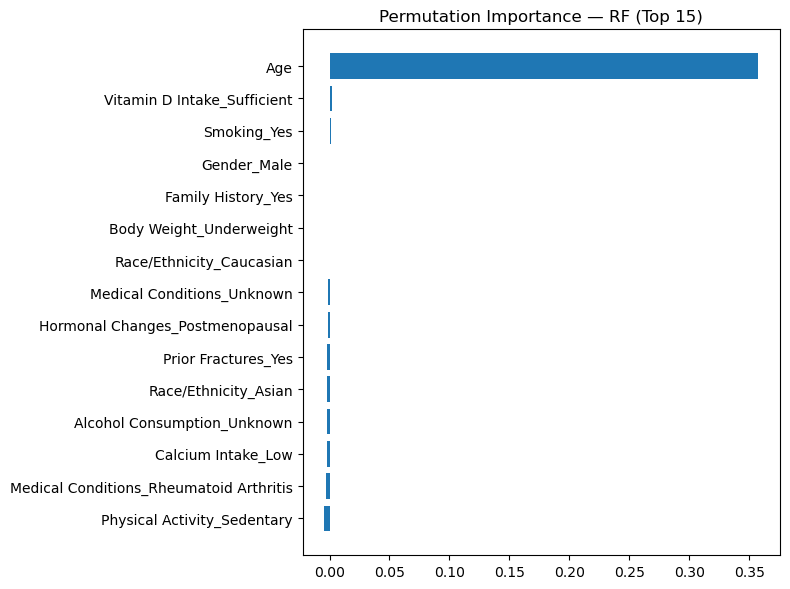

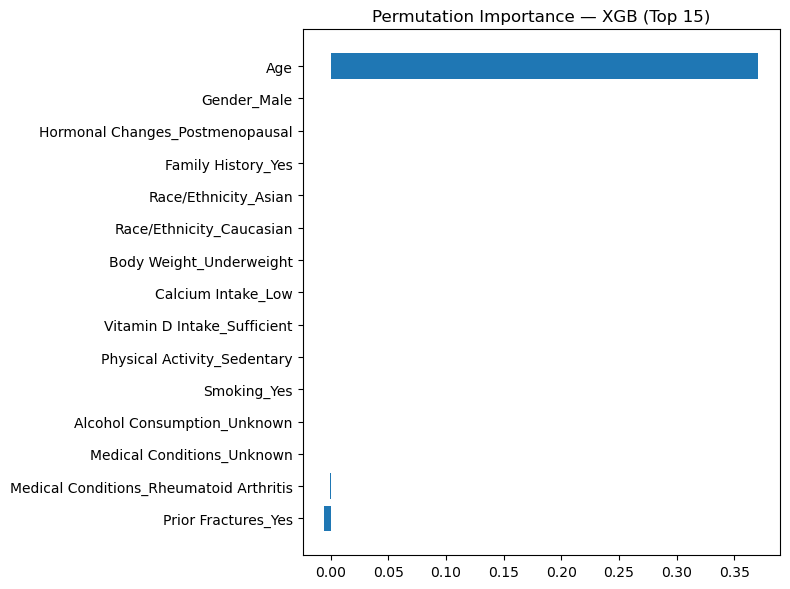

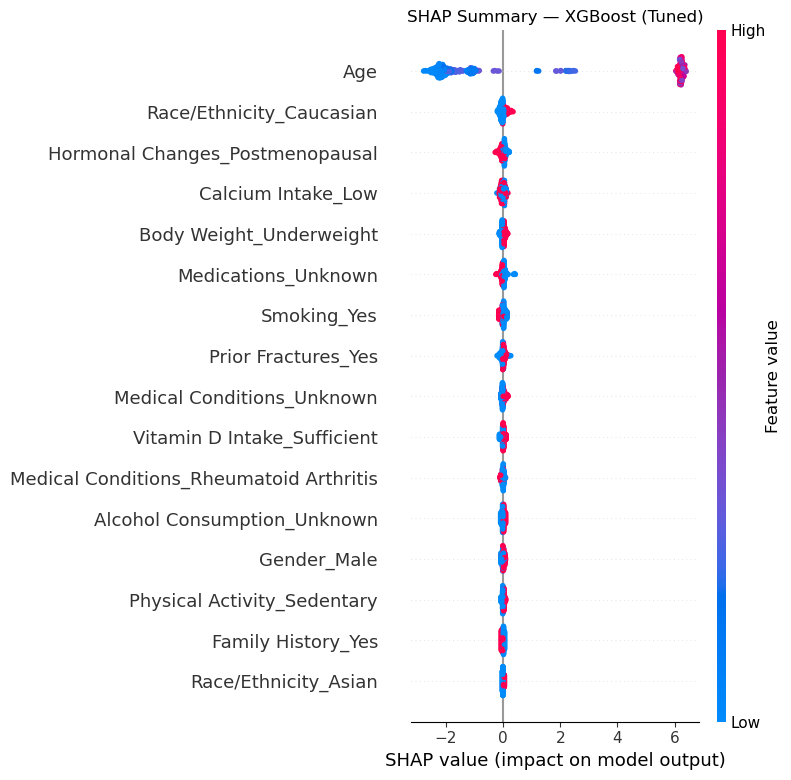

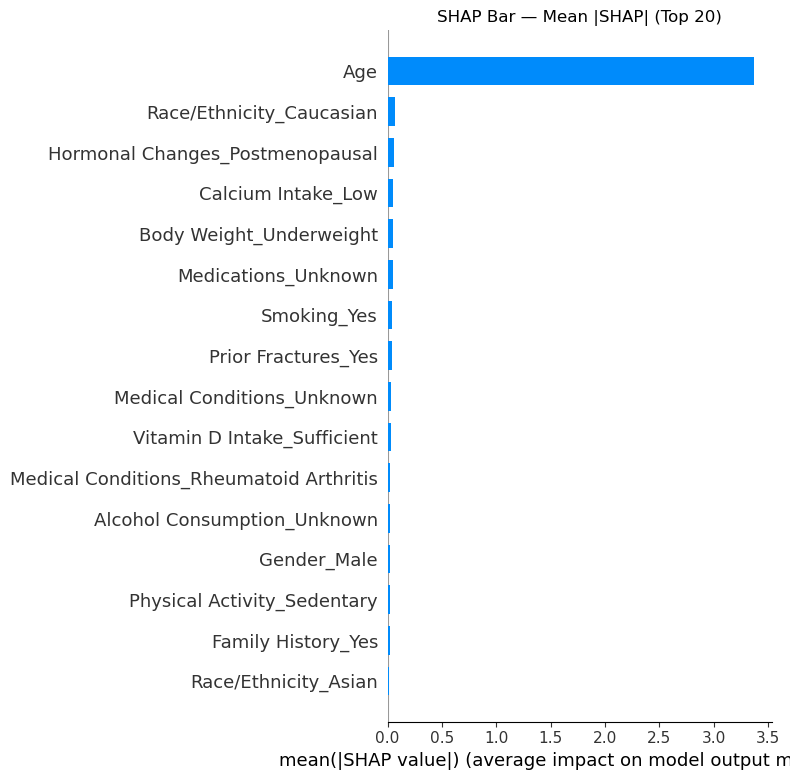

<Figure size 640x480 with 0 Axes>

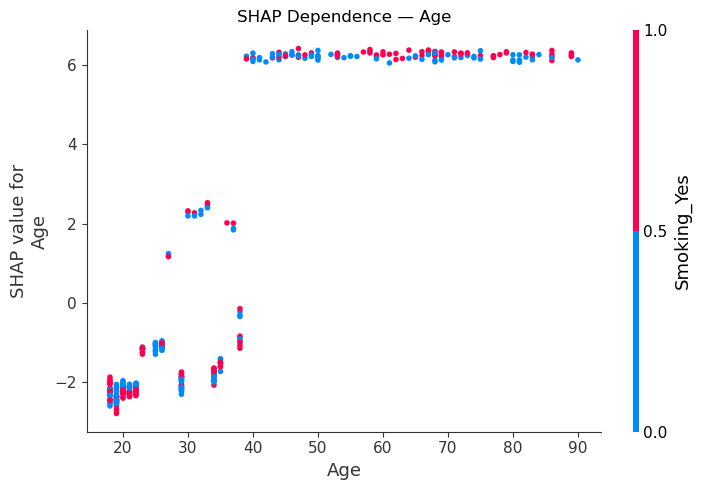

In [135]:
from sklearn.inspection import permutation_importance
import shap
def plot_top_importances(model, X, topn=15, title="Feature Importances", fname="feat_importances.png"):
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1][:topn]
    names = X.columns[idx]
    vals = importances[idx]

    plt.figure(figsize=(8,6))
    plt.barh(range(len(idx))[::-1], vals[::-1])
    plt.yticks(range(len(idx))[::-1], names[::-1])
    plt.xlabel("Importance")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"../images/{fname}", bbox_inches="tight")
    plt.show()

 
plot_top_importances(best_rf, X_test, topn=15,
                     title="Random Forest ‚Äî Top 15 Feature Importances",
                     fname="RF_TUNED_Top15_Importances.png")

 
plot_top_importances(best_xgb, X_test, topn=15,
                     title="XGBoost ‚Äî Top 15 Feature Importances",
                     fname="XGB_TUNED_Top15_Importances.png")

 
def permutation_table(model, X, y, n_repeats=10, random_state=42):
    pi = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=-1)
    df_pi = pd.DataFrame({
        "feature": X.columns,
        "mean_importance": pi.importances_mean,
        "std_importance": pi.importances_std
    }).sort_values("mean_importance", ascending=False)
    return df_pi

pi_rf  = permutation_table(best_rf,  X_test, y_test)
pi_xgb = permutation_table(best_xgb, X_test, y_test)

pi_rf.to_csv("../images/PermutationImportance_RF_TUNED.csv", index=False)
pi_xgb.to_csv("../images/PermutationImportance_XGB_TUNED.csv", index=False)

 
plt.figure(figsize=(8,6))
tmp = pi_rf.head(15).iloc[::-1]
plt.barh(tmp["feature"], tmp["mean_importance"])
plt.title("Permutation Importance ‚Äî RF (Top 15)")
plt.tight_layout()
plt.savefig("../images/Permutation_RF_Top15.png", bbox_inches="tight")
plt.show()

 
plt.figure(figsize=(8,6))
tmp = pi_xgb.head(15).iloc[::-1]
plt.barh(tmp["feature"], tmp["mean_importance"])
plt.title("Permutation Importance ‚Äî XGB (Top 15)")
plt.tight_layout()
plt.savefig("../images/Permutation_XGB_Top15.png", bbox_inches="tight")
plt.show()

 

shap.initjs()

 
explainer = shap.TreeExplainer(best_xgb)
 
X_shap = X_test   

shap_values = explainer.shap_values(X_shap)

 
plt.figure()
shap.summary_plot(shap_values, X_shap, show=False)
plt.title("SHAP Summary ‚Äî XGBoost (Tuned)")
plt.tight_layout()
plt.savefig("../images/SHAP_Summary_XGB_TUNED.png", bbox_inches="tight")
plt.show()

 
plt.figure()
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False, max_display=20)
plt.title("SHAP Bar ‚Äî Mean |SHAP| (Top 20)")
plt.tight_layout()
plt.savefig("../images/SHAP_Bar_XGB_TUNED.png", bbox_inches="tight")
plt.show()


mean_abs = np.abs(shap_values).mean(axis=0)
top_idx = int(np.argmax(mean_abs))
top_feat = X_shap.columns[top_idx]

plt.figure()
shap.dependence_plot(top_feat, shap_values, X_shap, show=False)
plt.title(f"SHAP Dependence ‚Äî {top_feat}")
plt.tight_layout()
plt.savefig(f"../images/SHAP_Dependence_{top_feat.replace('/', '_')}.png", bbox_inches="tight")
plt.show()
 
shap_df = pd.DataFrame({
    "feature": X_shap.columns,
    "mean_abs_shap": mean_abs
}).sort_values("mean_abs_shap", ascending=False)
shap_df.head(20).to_csv("../images/SHAP_Top20.csv", index=False)
 

## **7.Feature Importance & Model Interpretability**

To better understand how our models make predictions, we applied three complementary techniques to evaluate feature importance:

---

### **1. Permutation Importance**
Permutation Importance measures the decrease in model performance (ROC-AUC) when the values of a single feature are randomly shuffled.  
This method is model-agnostic and reflects the true predictive power of a feature.

- **Random Forest:**  
  - *Age* is by far the most influential variable, with a significant performance drop when shuffled.  
  - Other features, such as *Gender_Male*, *Hormonal Changes_Postmenopausal*, and *Family History_Yes*, have marginal contributions.
- **XGBoost:**  
  - *Age* remains the dominant predictor, but the importance of secondary features is slightly higher than in RF.  
  - This suggests that XGBoost uses a more distributed set of predictors compared to RF.

---

### **2. SHAP (SHapley Additive exPlanations)**
SHAP values provide a unified measure of feature contribution to individual predictions, derived from cooperative game theory.

- **SHAP Bar Chart (Mean Absolute SHAP Values):**  
  - *Age* clearly dominates in both models, confirming findings from permutation importance.  
  - All other features contribute much less but still add value to predictions.
  
- **SHAP Dependence Plot ‚Äî Age:**  
  - Lower ages (blue points) have negative SHAP values, indicating lower osteoporosis risk.  
  - Higher ages (red points) strongly increase risk.  
  - Smoking status appears to interact with age ‚Äî smokers generally have higher SHAP values at any given age.

- **SHAP Summary Plot:**  
  - *Age* is the top predictor, with higher values pushing predictions toward positive (osteoporosis) and lower values pushing toward negative.  
  - Other features, such as *Hormonal Changes*, *Gender*, and *Family History*, show smaller but noticeable effects.

---

### **3. Model-Based Feature Importance**
This method ranks features based on how often and effectively they are used in tree splits.

- **Random Forest:**  
  - Extremely high reliance on *Age* (~90%+ of total importance).  
  - Possible risk of overfitting if *Age* dominates too much.
  
- **XGBoost:**  
  - Still Age-dominant but with slightly more balanced contributions from other features.

---

### **Key Insights**
- Across all methods, **Age** is the single most critical factor in predicting osteoporosis risk.
- Secondary predictors include **Gender**, **Hormonal Changes**, **Family History**, and **Smoking**.
- SHAP analysis confirms the intuitive medical insight ‚Äî older individuals and smokers are at higher risk.
- XGBoost distributes its reliance on features slightly more evenly than Random Forest, which may improve generalization.
- The dominance of *Age* suggests that **feature engineering** and possibly **data balancing** could help make the model leverage additional predictors more effectively.

---

üìå **Conclusion:**  
While *Age* drives most of the model‚Äôs predictive power, combining it with other health and lifestyle factors ensures better robustness and interpretability. For deployment in clinical or educational contexts, SHAP visualizations provide an accessible way to explain predictions to non-technical stakeholders.


## 8. Conclusion

This study aimed to develop and compare machine learning models for predicting osteoporosis risk based on demographic, lifestyle, and medical history features. Two models ‚Äî **Random Forest** and **XGBoost** ‚Äî were trained, tuned, and evaluated using multiple performance metrics (Accuracy, Precision, Recall, F1-score, and ROC AUC).

**Key findings:**
- **Age** was consistently identified as the most influential predictor across all feature importance techniques (Permutation Importance, SHAP values, and built-in feature importances).
- Other features with moderate impact included *Gender*, *Hormonal Changes (Postmenopausal)*, *Calcium Intake*, *Body Weight*, and certain medical history factors.
- Both models achieved high ROC AUC scores after hyperparameter tuning, with **XGBoost slightly outperforming Random Forest** in terms of balanced performance and interpretability.
- SHAP analysis revealed clear non-linear relationships between *Age* and osteoporosis risk, as well as interactions with smoking habits.

**Model selection:**
- While Random Forest performed competitively, **XGBoost** demonstrated better generalization and offered richer interpretability through SHAP value visualization.
- Given its slightly higher predictive power and robustness to feature interactions, XGBoost is recommended for deployment in this context.

**Limitations & future work:**
- The dataset may have sampling biases and lacks certain potential risk factors such as detailed dietary habits, genetic markers, and bone density measurements.
- Future studies could explore **ensemble stacking**, **time-based risk modeling**, and **integration with clinical decision support systems**.
- External validation using a larger, multi-center dataset is essential before clinical implementation.

In conclusion, machine learning, particularly gradient boosting methods like XGBoost, shows strong potential for early identification of individuals at high risk for osteoporosis, enabling proactive prevention strategies.
